In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

In [15]:
survey_length = 90 # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['y']
bfs = []
# Target number of observations
bfs.append(fs.Target_map_basis_function(filtername='y', target_map=target_map))
# Mask everything but the South
bfs.append(fs.Quadrant_basis_function(quadrants=['S']))
# throw in the depth percentile for good measure
bfs.append(fs.Depth_percentile_basis_function())

weights = np.array([10., 1., .5])

survey = fs.Marching_army_survey(bfs, weights)
scheduler = fs.Core_scheduler([survey])

In [16]:
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='y_marching_south.db')

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 109.3%Completed 4018 observations


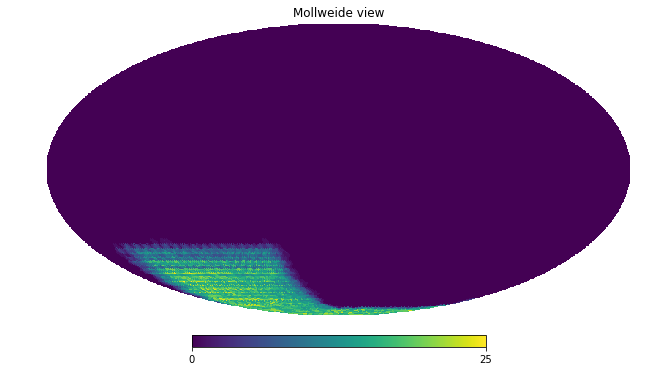

In [17]:
hp.mollview(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature)

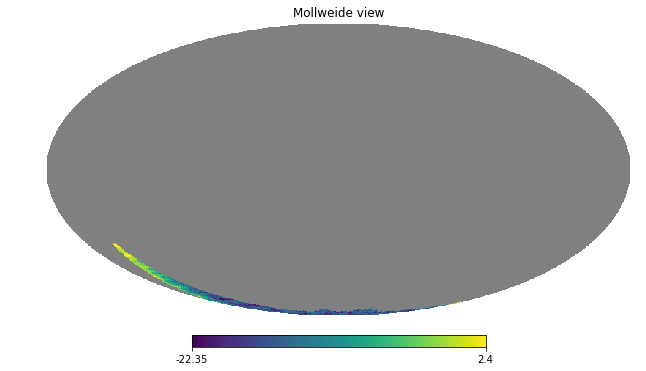

In [18]:
hp.mollview(scheduler.surveys[0].reward)

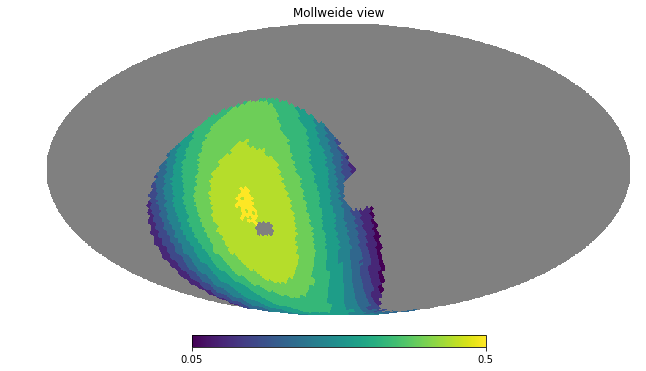

In [19]:
hp.mollview(scheduler.surveys[0].basis_functions[2]() )

In [20]:
scheduler.surveys[0].basis_functions

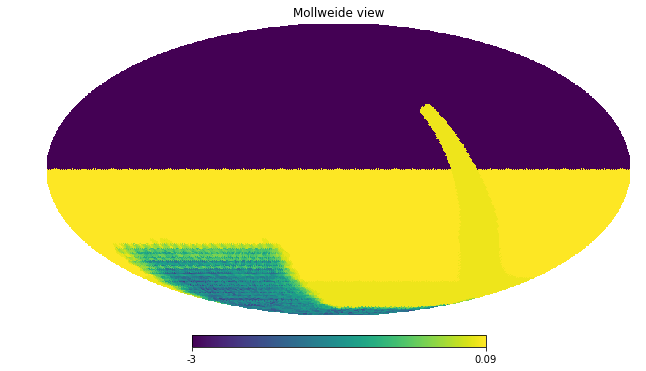

In [28]:
hp.mollview(scheduler.surveys[0].basis_functions[0](), min=-3)

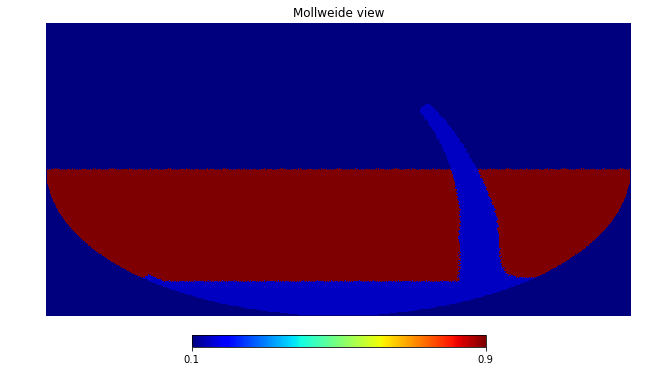

In [22]:
hp.mollview(target_map, min=0.1, cmap='jet')

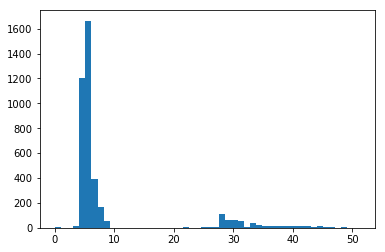

In [23]:
none = plt.hist(observations['slewtime'], bins=50)

In [26]:
np.mean(observations['slewtime'][0:40])

5.3965805517470562

In [12]:
observations.dtype

dtype([('RA', '<f8'), ('dec', '<f8'), ('mjd', '<f8'), ('exptime', '<f8'), ('filter', '<U1'), ('rotSkyPos', '<f8'), ('nexp', '<i8'), ('airmass', '<f8'), ('FWHMeff', '<f8'), ('FWHM_geometric', '<f8'), ('skybrightness', '<f8'), ('night', '<i8'), ('slewtime', '<f8'), ('fivesigmadepth', '<f8'), ('alt', '<f8'), ('az', '<f8'), ('clouds', '<f8')])

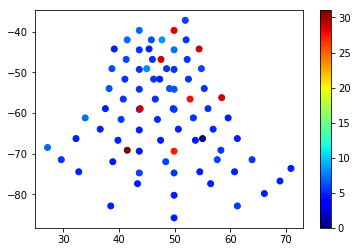

In [11]:
plt.scatter(observations['RA'][0:80], observations['dec'][0:80], c=observations['slewtime'][0:80], cmap='jet')
plt.colorbar()

In [14]:
np.diff(observations['mjd']*24.*3600.)-30

array([ 6.79772091,  7.54264164,  7.49381638, ...,  6.79765129,
        7.43666553,  7.3917942 ])